In [1]:
#IMPORTAMOS TODAS LAS LIBRERÍAS NECESARIAS
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

**IMPORTAMOS LA DATA**

El primer paso será importar la data, unirla y realizar un análisis exploratorio de los datos. Esto nos ayudará a entender mejor la data con la cual estamos trabajando.

In [2]:
train_labels=pd.read_csv("xdata.csv")
train_val=pd.read_csv("ydata.csv")

In [3]:
data=pd.merge(train_labels, train_val, on="id")

In [4]:
data.head(7)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
(data.isnull().sum()/data.count())*100

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.522246
gps_height                0.000000
installer                 6.556642
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.003367
num_private               0.000000
basin                     0.000000
subvillage                0.628505
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.946563
recorded_by               0.000000
scheme_management         6.984619
scheme_name              94.181105
permit                    5.423825
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

Comprobamos el porcentaje de nulos que existen. Como podemos ver existe un porcentaje muy alto de nulos en scheme_name.
No tendría sentido imputar tantos, por lo que lo más razonable sería borrarlo. El resto de variables por su cantidad baja de nulos, podrían imputarse más adelante.

In [7]:
data_cat=data.select_dtypes(exclude=np.number)
data_cat.apply(lambda x: len(x.unique()))

date_recorded              356
funder                    1897
installer                 2146
wpt_name                 37400
basin                        9
subvillage               19288
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

Algunas variables disponen de demasiadas categorías, por lo que obtendremos demasiadas dummies. 
Se puede plantear la idea de unir categorías

Vamos a hacer un análisis gráfico:

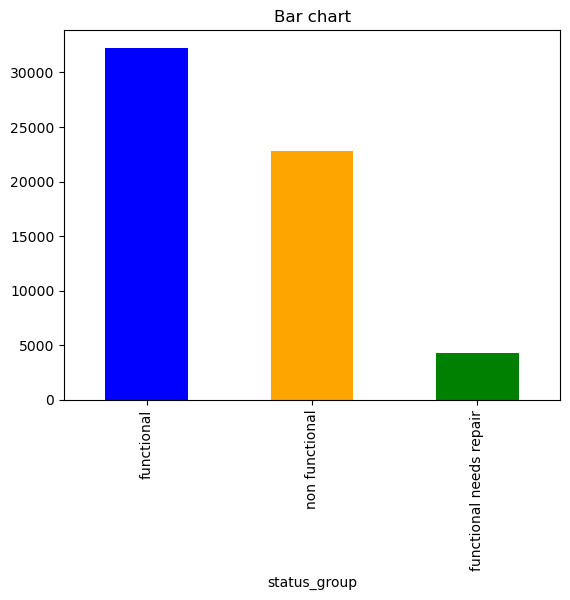

In [8]:
ax, fig = plt.subplots()
etiquetas = data.status_group.value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "orange", "green"])
plt.xticks(range(len(etiquetas)), etiquetas.index)
plt.title('Bar chart')
plt.show()

Como podemos comprobar existe un gran número de etiquetas funcionales, mientras que existen muy pocas de functional needs repair. Proablemente nuestro modelo sea muy bueno prediciendo las funcionales y muy malo con el último por falta de información.

**LIMPIEZA DE LOS DATOS**

Borramos variables innecesarias desde el principio: 
1. Vamos a borrar variables como id pues no aporta explicación al modelo
2. scheme_name por tener muchos null

In [9]:
data=data.drop(["id", "scheme_name"], axis=1)

ANÁLISIS CATEGÓRICAS:

Vamos a estudiar como reducir las variables categóricas. La idea es seleccionar aquellas que tengan mayor porcentaje explicativo. Asímismo, muchas de ellas tienen muchas categorias por lo que cuando queramos trabajar con dummies van a salir una gran cantidad. Por ese motivo no se ha obtado por su representación gráfica, pues tomaría muchos recursos computacionales. Crearemos funciones que nos ayuden a reducirlas. También existen variables categóricas con categorias desconocidas, por lo que imputarlas será buena idea.

In [10]:
data.funder.value_counts(1)

funder
Government Of Tanzania    0.162904
Danida                    0.055843
Hesawa                    0.039489
Rwssp                     0.024640
World Bank                0.024192
                            ...   
Muwasa                    0.000018
Msigw                     0.000018
Rc Mofu                   0.000018
Overland High School      0.000018
Samlo                     0.000018
Name: proportion, Length: 1896, dtype: float64

In [11]:
#función para reducir categorias de funder
def reduc_funder(x):
    if x=="Government Of Tanzania":
        return "GOT"
    if x=="Danida":
        return "DANIDA"
    if x=="Hesawa":
        return "HESAWA"
    if x=="Rwssp":
        return "RWSSP"
    if x=="World Bank":
        return "WB"
    else:
        return "OTHERS"

In [12]:
#imputamos funder y aplicamos la función
moda = data["funder"].mode()[0]
data["funder"] = data["funder"].fillna(moda)
data["funder"] = data["funder"].apply(lambda x: reduc_funder(x))

In [13]:
data.installer.value_counts()

installer
DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: count, Length: 2145, dtype: int64

In [14]:
#función para reducir installer
def reduc_installer(x):
    if x=="DWE":
        return "DWE"
    if x=="Goverment":
        return "GOVERMENT"
    if x=="RWE":
        return "RWE"
    if x=="Commu":
        return "COMMU"
    if x=="DANIDA":
        return "DANIDA"
    else:
        return "OTHERS"

In [15]:
moda = data["installer"].mode()[0]
data["installer"] = data["installer"].fillna(moda)
data["installer"] = data["installer"].apply(lambda x: reduc_installer(x))

A continuación vamos a imputar todas aquellas variables que tenían nulos:

In [16]:
moda = data["permit"].mode()[0]
data["permit"] = data["permit"].fillna(moda)

In [17]:
moda = data["scheme_management"].mode()[0]
data["scheme_management"] = data["scheme_management"].fillna(moda)

In [18]:
moda = data["public_meeting"].mode()[0]
data["public_meeting"] = data["public_meeting"].fillna(moda)

Además existen vairables que aunque no aparezcan reflejadas como tal la presencia de nulos, presentan una categoría llamada unknwon. Ello nos da a entender que existen nulos, por tanto los imputaremos.

In [19]:
data.quantity.value_counts()

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [20]:
moda = data[data["quantity"] != "unknown"]["quantity"].mode()[0]
# Rellenar los valores faltantes con la moda
data["quantity"] = data["quantity"].fillna(moda)

In [21]:
data.source.value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [22]:
moda = data[data["source"] != "unknown"]["source"].mode()[0]

# Rellenar los valores faltantes con la moda
data["source"] = data["source"].fillna(moda)

También las variables de la región paracen muy correlacionadas entre si, por ello sería interesante quedarnos con aquellas que tengan menos categorías, osea *region*. Esta nos seguirá aportando información útil sobre la ubicación.

In [23]:
#RELACIÓN ENTRE REGION, REGION_CODE 
contingency_table = pd.crosstab(data['region'], data['region_code'])
contingency_table.head(5)

region_code,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,24,40,60,80,90,99
region,,,,,,,,,,,,,,,,,,,,,
Arusha,0,3024,0,0,0,0,0,0,0,0,...,0,0,0,0,326,0,0,0,0,0
Dar es Salaam,0,0,0,0,0,0,805,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dodoma,2201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Iringa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kagera,0,0,0,0,0,0,0,0,0,0,...,3316,0,0,0,0,0,0,0,0,0


In [24]:
data.lga.value_counts()
#se borrará pues con region_code será bastante

lga
Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: count, Length: 125, dtype: int64

In [25]:
data.ward.value_counts()

ward
Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: count, Length: 2092, dtype: int64

Tras este análisis se ha determinado se ha obtado por eliminar las siguientes variables, ya que con las restantes variables categóricas se puede obetener un gran resultado explicativo.

In [26]:
data=data.drop(["quantity_group","payment_type", "management", "source_type", "waterpoint_type",
                "extraction_type", "extraction_type_group",
                "ward","lga","subvillage","region", "wpt_name", "district_code"], axis=1)

NUMÉRICAS:

En cuanto a este tipo, vamos a estudiar la correlación presente entre entre la variable objetivo y el resto de variables. Además de comprender cuales presentan correlación entre sí.
También se optará por imputar aquellas variables que  presenten nulos a través de la moda o mediana. La elección de estas opciones ha sido gracias a la prueba y error, quedándonos con aquellas que nos daban mejor resultado en el modelo.
Igualmente, en este apartado se han borrado aquellas variables que no nos aportan información al modelo.

Igualmente se ha hecho una transformación de la variable y a numérica a través de la siguiente función:

In [27]:
def y_transform(x):
    if x=="non functional":
        return 0
    if x=="functional":
        return 1
    else:
        return 2
data["status_group"] = data["status_group"].apply(lambda x: y_transform(x))

<Axes: >

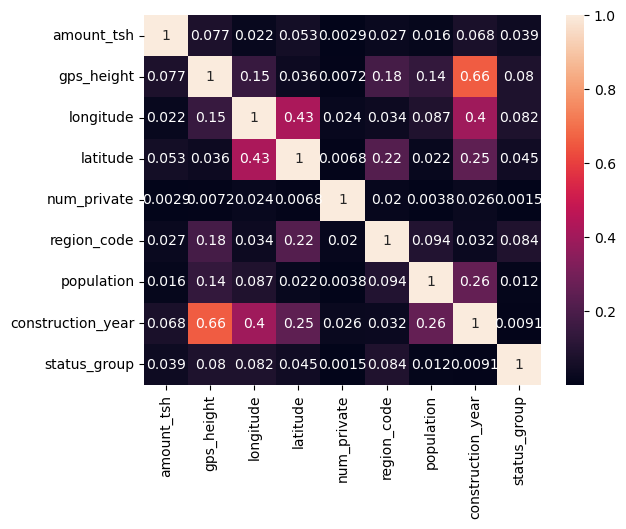

In [28]:
#SE OBSERVAN LAS VARIABLES NÚMERICAS A TRAVÉS DE LA MATRIZ DE CORRELACIÓN
data_numerica = data.select_dtypes(include=np.number)
corr = abs(data_numerica.corr())
sns.heatmap(corr, annot=True)

In [29]:
data["num_private"].value_counts()
#Vamos a borrarlo porque está lleno de ceros

num_private
0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: count, Length: 65, dtype: int64

In [30]:
data.construction_year.value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

In [31]:
data.population.value_counts()

population
0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: count, Length: 1049, dtype: int64

A continuación realizaremos las transformaciones necesarias para imputar los valores faltantes:

In [32]:
mean_construction_year = data['construction_year'].mean()
data['construction_year'] = data['construction_year'].replace(0, mean_construction_year)

In [33]:
mean_latitude_year = data['latitude'].mean()
data['latitude'] = data['latitude'].replace(0, mean_latitude_year)

In [34]:
mean_longitude_year = data['longitude'].mean()
data['longitude'] = data['longitude'].replace(0, mean_longitude_year)

In [35]:
mean_population_year = data['population'].mean()
data['population'] = data['population'].replace(0, mean_population_year)

In [36]:
mean_region = data['gps_height'].mean()
data['gps_height'] = data['gps_height'].replace(0, mean_region)

In [37]:
median_amount = data['amount_tsh'].median()
data['amount_tsh'] = data['amount_tsh'].replace(0, median_amount)

<Axes: >

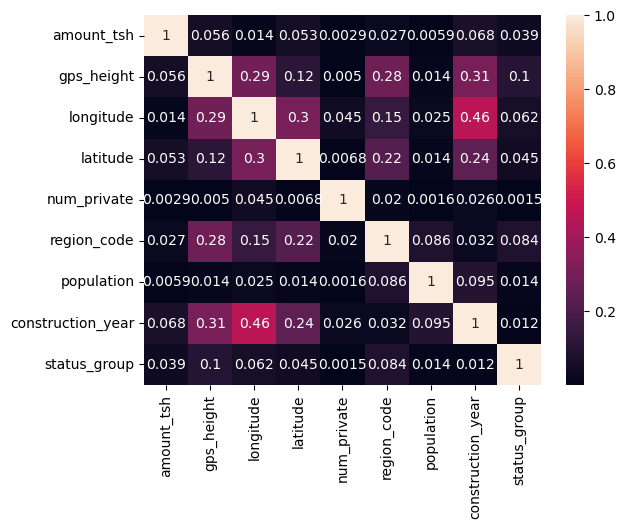

In [38]:
data_numerica = data.select_dtypes(include=np.number)
corr = abs(data_numerica.corr())
sns.heatmap(corr, annot=True)

Se ha reducido bastante la correlación entre las variables. Además, se ha decidido borrar num_private por su poca aportación al modelo

In [39]:
data=data.drop(["num_private"], axis=1)

In [40]:
data.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,population,construction_year,status_group
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,898.240993,35.116960,-5.706033e+00,15.297003,244.668491,1754.107224,0.688434
std,2997.574558,523.318156,2.573963,2.946019e+00,17.587406,454.368583,331.903637,0.599877
min,0.000000,-90.000000,29.607122,-1.164944e+01,1.000000,1.000000,1300.652475,0.000000
25%,0.000000,668.297239,33.354079,-8.540621e+00,5.000000,100.000000,1300.652475,0.000000
50%,0.000000,668.297239,34.908743,-5.021597e+00,12.000000,179.909983,1986.000000,1.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,215.000000,2004.000000,1.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,30500.000000,2013.000000,2.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  float64
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   basin                  59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   population             59400 non-null  float64
 10  public_meeting         59400 non-null  bool   
 11  recorded_by            59400 non-null  object 
 12  scheme_management      59400 non-null  object 
 13  permit                 59400 non-null  bool   
 14  construction_year      59400 non-null  float64
 15  ex

Continuamos analizando la presencia de variables con booleanas. Sería interesante cambiarlos a valores de 1 o 0

In [42]:
data.permit.value_counts()

permit
True     41908
False    17492
Name: count, dtype: int64

In [43]:
data.public_meeting.value_counts()

public_meeting
True     54345
False     5055
Name: count, dtype: int64

In [44]:
categoricas_binarias=["permit","public_meeting"]
for j in categoricas_binarias:
    data[j] = [0 if x == True else 1 for x in data[j]]

Contiamos manipulando las fechas. En la matriz de correlación se pudo ver como el año de construcción tenía corralación con la varibale dependiente, por lo que el tiempo va a ser importante en el modelo. Vamos a diseccionar la variable date_recorder en días, meses y años. También crearemos una vaiable nueva que mida la duración desde el año de construcción

In [45]:
#hay que transformar data_recorder a formato fecha
data["date_recorded"]=pd.to_datetime(data["date_recorded"])
min_date = data['date_recorded'].min()
data['date_recorded_days'] = (data['date_recorded'] - min_date).dt.days
data['month_recorded'] = data['date_recorded'].dt.month
data['year_recorded'] = data['date_recorded'].dt.year
data=data.drop("date_recorded", axis=1)


In [46]:
#Añadimos una nueva variable
data["duration"]=data['year_recorded']-data["construction_year"]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  float64
 3   installer              59400 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region_code            59400 non-null  int64  
 8   population             59400 non-null  float64
 9   public_meeting         59400 non-null  int64  
 10  recorded_by            59400 non-null  object 
 11  scheme_management      59400 non-null  object 
 12  permit                 59400 non-null  int64  
 13  construction_year      59400 non-null  float64
 14  extraction_type_class  59400 non-null  object 
 15  ma

Obtenemos dummies, antes de pasar al entrenamiento

In [48]:
data_dummies=pd.get_dummies(data)

In [49]:
data_dummies

,amount_tsh,gps_height,longitude,latitude,region_code,population,public_meeting,permit,construction_year,status_group,...,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390.000000,34.938093,-9.856322,11,109.000000,0,1,1999.000000,1,...,False,True,False,False,False,True,False,False,False,False
1,0.0,1399.000000,34.698766,-2.147466,20,280.000000,0,0,2010.000000,1,...,False,False,True,False,False,True,False,False,False,False
2,25.0,686.000000,37.460664,-3.821329,21,250.000000,0,0,2009.000000,1,...,False,False,True,False,False,True,False,False,False,False
3,0.0,263.000000,38.486161,-11.155298,90,58.000000,0,0,1986.000000,0,...,False,True,False,False,False,True,False,False,False,False
4,0.0,668.297239,31.130847,-1.825359,18,179.909983,0,0,1300.652475,1,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.000000,37.169807,-3.253847,3,125.000000,0,0,1999.000000,1,...,False,True,False,False,False,True,False,False,False,False
59396,4700.0,1212.000000,35.249991,-9.070629,11,56.000000,0,0,1996.000000,1,...,False,False,True,False,False,True,False,False,False,False
59397,0.0,668.297239,34.017087,-8.750434,12,179.909983,0,1,1300.652475,1,...,False,True,False,False,False,False,False,True,False,False
59398,0.0,668.297239,35.861315,-6.378573,1,179.909983,0,0,1300.652475,1,...,False,True,False,False,False,False,False,True,False,False


**ENTRENAMIENTO**

Vamos a dividir nuestro datasete en dos matrices X e Y para luego hacer las divisiones en train y test. Se ha optado por un tamaño de test del 25% por lo que el 75% irá a train

In [50]:
X=data_dummies.drop("status_group", axis=1)
Y=data_dummies["status_group"]
X_train, x_test, Y_train, y_test=train_test_split(X, Y, test_size=0.25, random_state=12, stratify =Y)

In [51]:
X

,amount_tsh,gps_height,longitude,latitude,region_code,population,public_meeting,permit,construction_year,date_recorded_days,...,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390.000000,34.938093,-9.856322,11,109.000000,0,1,1999.000000,3073,...,False,True,False,False,False,True,False,False,False,False
1,0.0,1399.000000,34.698766,-2.147466,20,280.000000,0,0,2010.000000,3796,...,False,False,True,False,False,True,False,False,False,False
2,25.0,686.000000,37.460664,-3.821329,21,250.000000,0,0,2009.000000,3787,...,False,False,True,False,False,True,False,False,False,False
3,0.0,263.000000,38.486161,-11.155298,90,58.000000,0,0,1986.000000,3759,...,False,True,False,False,False,True,False,False,False,False
4,0.0,668.297239,31.130847,-1.825359,18,179.909983,0,0,1300.652475,3194,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.000000,37.169807,-3.253847,3,125.000000,0,0,1999.000000,3854,...,False,True,False,False,False,True,False,False,False,False
59396,4700.0,1212.000000,35.249991,-9.070629,11,56.000000,0,0,1996.000000,3127,...,False,False,True,False,False,True,False,False,False,False
59397,0.0,668.297239,34.017087,-8.750434,12,179.909983,0,1,1300.652475,3101,...,False,True,False,False,False,False,False,True,False,False
59398,0.0,668.297239,35.861315,-6.378573,1,179.909983,0,0,1300.652475,3067,...,False,True,False,False,False,False,False,True,False,False


Definimos 3 modelos simples al inicio. Todos ellos son de clasificación, pues es lo que buscamos. La idea es ver qué modelo obtiene una mejor accucary. Después buscaremos un modelo final modificando sus parámatros a fin de obetener un mejor rendimiento

In [52]:
model1=DecisionTreeClassifier()
model2=RandomForestClassifier()
model3=MLPClassifier()

In [53]:
model1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [54]:
model2.fit(X_train, Y_train)

RandomForestClassifier()

In [55]:
model3.fit(X_train, Y_train)

MLPClassifier()

In [56]:
y_pred1=model1.predict(x_test)

In [57]:
y_pred2=model2.predict(x_test)

In [58]:
y_pred3=model3.predict(x_test)

Una vez hechas las predicciones de los modelos, vamos a definir una función que nos permita valorar el mejor modelo

In [59]:
def saca_metricas(y_true, y_pred):
    # Matriz de confusión
    print('Matriz de Confusión:')
    print(confusion_matrix(y_true, y_pred))
    
    # Accuracy
    print('\nAccuracy:')
    print(accuracy_score(y_true, y_pred))
    
    # Precision (macro)
    print('\nPrecision (macro):')
    print(precision_score(y_true, y_pred, average='macro'))
    
    # Recall (macro)
    print('\nRecall (macro):')
    print(recall_score(y_true, y_pred, average='macro'))
    
    # F1-Score (macro)
    print('\nF1-Score (macro):')
    print(f1_score(y_true, y_pred, average='macro'))
    
    
  

In [60]:
saca_metricas(y_test, y_pred1)

Matriz de Confusión:
[[4327 1174  205]
 [1147 6430  488]
 [ 180  509  390]]

Accuracy:
0.7506397306397307

Precision (macro):
0.6393216217143571

Recall (macro):
0.6390141724767066

F1-Score (macro):
0.6391598320990889


In [61]:
saca_metricas(y_test, y_pred2)

Matriz de Confusión:
[[4457 1136  113]
 [ 766 7042  257]
 [ 146  559  374]]

Accuracy:
0.7995286195286195

Precision (macro):
0.7129405399151381

Recall (macro):
0.6669601516252017

F1-Score (macro):
0.6844740205158742


In [62]:
saca_metricas(y_test, y_pred3)

Matriz de Confusión:
[[5055  610   41]
 [4443 3497  125]
 [ 722  255  102]]

Accuracy:
0.5827609427609428

Precision (macro):
0.5589706265793665

Recall (macro):
0.4713478422686273

F1-Score (macro):
0.4496884846707709


Tras el estudio se ha determinado que aquellas que nos da mejores resultados es el modelo número 2 osea, random_forest.
A continuación se estudiará que parámetros son los mejores para obtener el mejor resultado posible en el modelo.

In [63]:
grid_param = {
    'n_estimators': [500, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [20,22],
    "max_features": ['auto', 'sqrt'],
    'min_samples_split': [2, 5],
}

In [64]:
model_grid = GridSearchCV(estimator=model2,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1, 
                        )

In [65]:
model_grid.fit(X_train, Y_train)

C:\Users\anais\anaconda3\envs\MasterDataScience\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anais\anaconda3\envs\MasterDataScience\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anais\anaconda3\envs\MasterDataScience\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\anais\anaconda3\envs\MasterDataScience\lib\site-packages\sklearn\base.py", line 637, in _validate_p

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 22],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 1000]},
             scoring='accuracy')

In [66]:
print(model_grid.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 1000}


Ya tenemos aquellos parámetros más eficientes, ahora vamos a definir el modelo con ellos:

In [67]:
model2_mejorado=RandomForestClassifier(criterion='entropy',
                                bootstrap= True, 
                                max_depth=20,
                                max_features='sqrt',
                                min_samples_split=5,
                                n_estimators=1000,
                                random_state=1)

In [68]:
model2_mejorado.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=1)

In [69]:
y_pred=model2_mejorado.predict(x_test)

In [70]:
saca_metricas(y_test, y_pred)

Matriz de Confusión:
[[4273 1372   61]
 [ 564 7382  119]
 [ 135  642  302]]

Accuracy:
0.8051851851851852

Precision (macro):
0.7572073991138829

Recall (macro):
0.6480209051193142

F1-Score (macro):
0.6776033628172701


Ya tenemos un modelo bastante competitivo. Por lo visto, el modelo se confunde bastante con la categoría 1 y 2. Esto es completamente normal pues tenemos muchos más datos provenientes de esa categoría que de la segunda.

Utilizamos la validación cruzada repetida a fin de ver si el modelo no está sobreajustado. Sacaremos una media de todos los accuraccy para hacernos una idea de la fuerza predictiva real.

In [71]:
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

In [72]:
accuracy_scores = []
for train_index, test_index in rkf.split(data):
    model2_mejorado.fit(X_train, Y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model2_mejorado.predict(x_test)
    
    # Calcular el puntaje de precisión y guardarlo en la lista
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calcular la precisión promedio sobre todas las repeticiones
average_accuracy = np.mean(accuracy_scores)
print("Precisión promedio:", average_accuracy)

Precisión promedio: 0.805185185185185


Igualmente, se ha optado por manipular los parámetros de forma manual buscando obtener mejor resultado en base al modelo anterior. Después se ha vuelto a calcular la validación cruzada repetida:

In [116]:
model3_mejorado=RandomForestClassifier(criterion='gini',
                                bootstrap= True, 
                                max_depth=25,
                                max_features='sqrt',
                                min_samples_split=6,
                                n_estimators=1000,
                                random_state=1)

In [117]:
model3_mejorado.fit(X_train, Y_train)

RandomForestClassifier(max_depth=25, min_samples_split=6, n_estimators=1000,
                       random_state=1)

In [118]:
y_pred=model3_mejorado.predict(x_test)

In [119]:
saca_metricas(y_test, y_pred)

Matriz de Confusión:
[[4370 1264   72]
 [ 627 7290  148]
 [ 142  609  328]]

Accuracy:
0.8072727272727273

Precision (macro):
0.7481637006199922

Recall (macro):
0.6579171449436028

F1-Score (macro):
0.6851313765536955


In [122]:
accuracy_scores = []
for train_index, test_index in rkf.split(data):
    model3_mejorado.fit(X_train, Y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model3_mejorado.predict(x_test)
    
    # Calcular el puntaje de precisión y guardarlo en la lista
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calcular la precisión promedio sobre todas las repeticiones
average_accuracy = np.mean(accuracy_scores)
print("Precisión promedio:", average_accuracy)

Precisión promedio: 0.807272727272727


Parece ser que nuestro modelo no está sobreajustado. Ya tenemos modelo para llevar a cabo la predicción de las bombas en Tanzania.

**PREDICCIÓN**

Finalmente llegó la hora de comprobar la calidad predictiva de nuestro modelo. Para ello cargamos los datos que tenemos que predecir. Por otro lado, los tratamos exactamemte igual que hicimos con el preprocesado. Es importante que nuestro modelo reciba la información exactamente igual de como ha sido entrenando. Por último, montaremos un dataset con las predicciones y lo guardaremos en un archivo csv listo para validar en la web del concurso. 

In [124]:
prediccion=pd.read_csv("data_predecir.csv")

In [125]:
#se borran todas las variables innecesarias
data_prediccion=prediccion.drop(["id", "scheme_name","num_private",
                "quantity_group","payment_type", "management", "source_type", "waterpoint_type",
                "extraction_type", "extraction_type_group",
                "ward","lga","subvillage","region", "district_code", "wpt_name"], axis=1)

In [126]:
data_prediccion.funder.value_counts()

funder
Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Craelius                     1
Tanroad                      1
Ndanda Missions              1
Wards                        1
Livin                        1
Name: count, Length: 979, dtype: int64

Se le aplican a continuación todas las transformaciones que aplicamos al preprocesado, para asegurarnos que el modelo funciona de forma adecauada:

In [127]:
moda = data_prediccion["funder"].mode()[0]
data_prediccion["funder"] = data_prediccion["funder"].fillna(moda)
data_prediccion["funder"] = data_prediccion["funder"].apply(lambda x: reduc_funder(x))
moda = data_prediccion["installer"].mode()[0]
data_prediccion["installer"] = data_prediccion["installer"].fillna(moda)
data_prediccion["installer"] = data_prediccion["installer"].apply(lambda x: reduc_installer(x))

In [128]:
mean_construction_year = data_prediccion['construction_year'].mean()
data_prediccion['construction_year'] = data_prediccion['construction_year'].replace(0, mean_construction_year)

In [129]:
mean_latitude_year = data_prediccion['latitude'].mean()
data_prediccion['latitude'] = data_prediccion['latitude'].replace(0, mean_latitude_year)

In [130]:
mean_longitude_year = data_prediccion['longitude'].mean()
data_prediccion['longitude'] = data_prediccion['longitude'].replace(0, mean_longitude_year)

In [131]:
mean_population_year = data_prediccion['population'].mean()
data_prediccion['population'] = data_prediccion['population'].replace(0, mean_population_year)

In [132]:
mean_region = data_prediccion['region_code'].mean()
data_prediccion['region_code'] = data_prediccion['region_code'].replace(0, mean_region)

In [133]:
mean_amount = data_prediccion['amount_tsh'].median()
data_prediccion['amount_tsh'] = data_prediccion['amount_tsh'].replace(0, mean_amount)

In [134]:
mean_amount = data_prediccion['gps_height'].mean()
data_prediccion['gps_height'] = data_prediccion['gps_height'].replace(0, mean_amount)

In [135]:
data_prediccion["date_recorded"]=pd.to_datetime(data_prediccion["date_recorded"])
min_date = data_prediccion['date_recorded'].min()
data_prediccion['date_recorded_days'] = (data_prediccion['date_recorded'] - min_date).dt.days
data_prediccion['month_recorded'] = data_prediccion['date_recorded'].dt.month
data_prediccion['year_recorded'] = data_prediccion['date_recorded'].dt.year
data_prediccion=data_prediccion.drop("date_recorded", axis=1)
data_prediccion["duration"]=data_prediccion['year_recorded']-data_prediccion["construction_year"]

In [136]:
categoricas_binarias=["permit","public_meeting"]
for j in categoricas_binarias:
    data_prediccion[j] = [0 if x == True else 1 for x in data_prediccion[j]]

In [137]:
data_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   funder                 14850 non-null  object 
 2   gps_height             14850 non-null  float64
 3   installer              14850 non-null  object 
 4   longitude              14850 non-null  float64
 5   latitude               14850 non-null  float64
 6   basin                  14850 non-null  object 
 7   region_code            14850 non-null  int64  
 8   population             14850 non-null  float64
 9   public_meeting         14850 non-null  int64  
 10  recorded_by            14850 non-null  object 
 11  scheme_management      13881 non-null  object 
 12  permit                 14850 non-null  int64  
 13  construction_year      14850 non-null  float64
 14  extraction_type_class  14850 non-null  object 
 15  ma

In [138]:
moda = data_prediccion["scheme_management"].mode()[0]
data_prediccion["scheme_management"] = data_prediccion["scheme_management"].fillna(moda)
moda = data["public_meeting"].mode()[0]
data_prediccion["public_meeting"] = data_prediccion["public_meeting"].fillna(moda)
moda = data_prediccion["public_meeting"].mode()[0]
data_prediccion["public_meeting"] = data_prediccion["public_meeting"].fillna(moda)

moda = data_prediccion[data_prediccion["quantity"] != "unknown"]["quantity"].mode()[0]
data_prediccion["quantity"] = data_prediccion["quantity"].fillna(moda)

moda = data_prediccion[data_prediccion["source"] != "unknown"]["source"].mode()[0]
data_prediccion["source"] = data_prediccion["source"].fillna(moda)

In [139]:
data_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   funder                 14850 non-null  object 
 2   gps_height             14850 non-null  float64
 3   installer              14850 non-null  object 
 4   longitude              14850 non-null  float64
 5   latitude               14850 non-null  float64
 6   basin                  14850 non-null  object 
 7   region_code            14850 non-null  int64  
 8   population             14850 non-null  float64
 9   public_meeting         14850 non-null  int64  
 10  recorded_by            14850 non-null  object 
 11  scheme_management      14850 non-null  object 
 12  permit                 14850 non-null  int64  
 13  construction_year      14850 non-null  float64
 14  extraction_type_class  14850 non-null  object 
 15  ma

In [140]:
X=pd.get_dummies(data_prediccion)

In [141]:
X

,amount_tsh,gps_height,longitude,latitude,region_code,population,public_meeting,permit,construction_year,date_recorded_days,...,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0.0,1996.000000,35.290799,-4.059696,21,321.0,0,0,2012.0,4333,...,False,False,True,False,False,False,False,False,False,True
1,0.0,1569.000000,36.656709,-3.309214,2,300.0,0,0,2000.0,4333,...,False,True,False,False,False,True,False,False,False,False
2,0.0,1567.000000,34.767863,-5.004344,13,500.0,0,1,2010.0,4330,...,False,False,True,False,False,False,False,False,False,True
3,0.0,267.000000,38.058046,-9.418672,80,250.0,1,0,1987.0,4320,...,False,True,False,False,False,False,False,False,False,True
4,500.0,1260.000000,35.006123,-10.950412,10,60.0,1,0,2000.0,4384,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,34.000000,38.852669,-6.582841,6,20.0,0,0,1988.0,3622,...,False,False,True,False,False,True,False,False,False,False
14846,1000.0,655.147609,37.451633,-5.350428,4,2960.0,0,1,1994.0,3647,...,False,True,False,False,False,False,False,True,False,False
14847,0.0,1476.000000,34.739804,-4.585587,13,200.0,0,1,2010.0,4361,...,False,False,True,False,False,True,False,False,False,False
14848,0.0,998.000000,35.432732,-10.584159,10,150.0,0,0,2009.0,4347,...,False,False,True,False,False,True,False,False,False,False


In [142]:
Y_PRED=model3_mejorado.predict(X)

In [143]:
Y_PRED=pd.Series(Y_PRED, name="status_group")
Y_PRED

0        1
1        1
2        1
3        0
4        1
        ..
14845    0
14846    1
14847    1
14848    1
14849    0
Name: status_group, Length: 14850, dtype: int64

In [144]:
def y_transform(x):
    if x==0:
        return "non functional"
    if x==1:
        return "functional"
    else:
        return 'functional needs repair'
status_group= Y_PRED.apply(lambda x: y_transform(x))

In [145]:
Archivo = pd.concat([prediccion['id'], status_group], axis=1)

In [146]:
Archivo.to_csv("Predicciones15.csv", index=False)

Tras subirlo se ha obtenido un accuraccy de 0.8059. 
Para conseguir ese score se han empleado un total del 15  intentos en total